# VV8. Jarðskjálftar og eldgos á Reykjanesskaga 2021

In [7]:
import pandas as pd

colNames = ['tími','latitude','longitude','magnitude']
url = 'https://cs.hi.is/python/skjalftar.txt'
df = pd.read_csv(url, sep='\s+', names = colNames,)
df['tími'] = pd.to_datetime(df['tími'])
dagur1 = pd.to_datetime('24.02.2021', dayfirst=True)
df['dagur'] = ((df['tími'] - dagur1).dt.total_seconds()/(60*60*24))
display(df)





,tími,latitude,longitude,magnitude,dagur
0,2021-02-24 10:05:57,63.919,-22.201,5.64,0.420799
1,2021-02-24 10:42:39,63.880,-21.622,4.39,0.446285
2,2021-02-24 10:49:00,63.889,-22.394,4.75,0.450694
3,2021-02-24 11:38:38,63.921,-21.948,4.04,0.485162
4,2021-02-24 12:37:30,63.928,-21.989,4.48,0.526042
5,2021-02-26 12:06:49,63.917,-22.250,4.52,2.504734
6,2021-02-26 12:24:13,63.920,-22.248,4.30,2.516817
7,2021-02-26 13:51:55,63.925,-22.235,4.02,2.577720
8,2021-02-26 15:10:31,63.936,-22.228,4.11,2.632303
9,2021-02-26 16:10:21,64.237,-24.746,4.47,2.673854


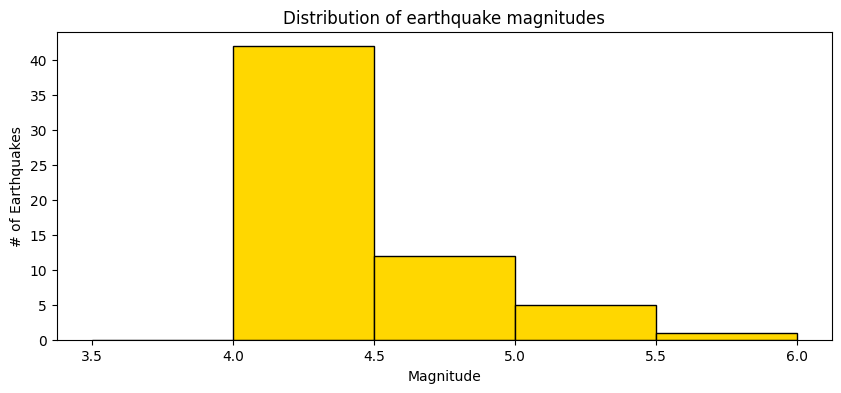

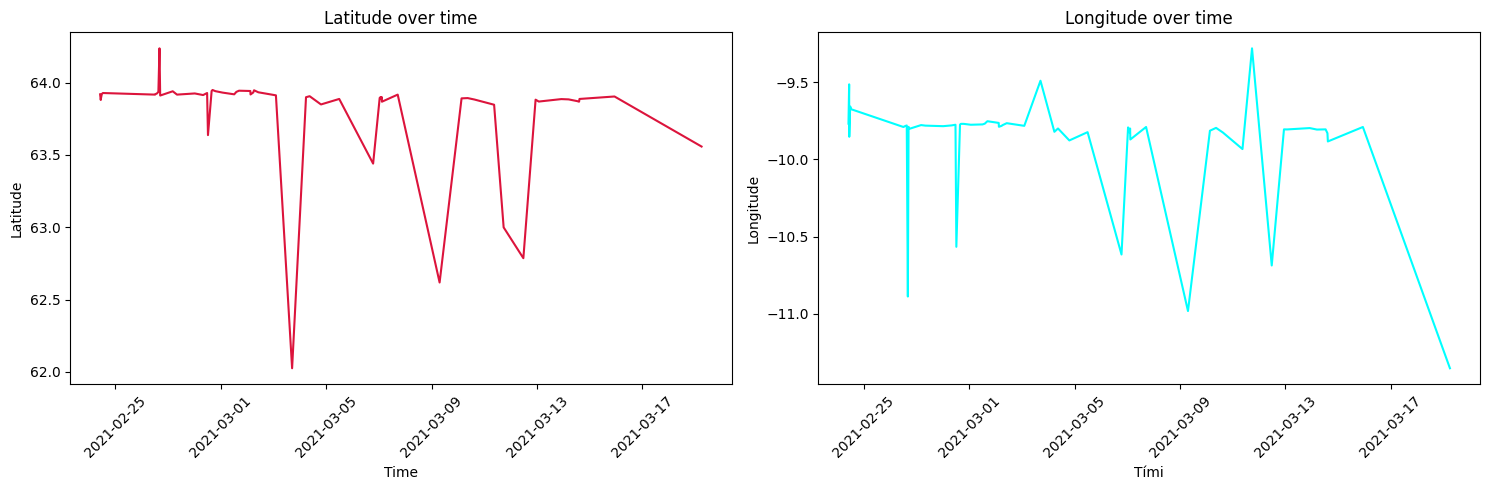

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(df['magnitude'], bins=[3.5, 4, 4.5, 5, 5.5, 6], edgecolor='black',color="gold")
plt.title('Distribution of earthquake magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('# of Earthquakes')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df['tími'], df['latitude'], label='Latitude', color='crimson')
ax[0].set_title('Latitude over time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Latitude')
ax[0].tick_params(axis='x', rotation=45)


df['breytt_long'] = df['longitude'] * 0.44
ax[1].plot(df['tími'], df['breytt_long'], label='Longitude', color='aqua')
ax[1].set_title('Longitude over time')
ax[1].set_xlabel('Tími')
ax[1].set_ylabel('Longitude')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Locate critical point by approximation using Gradient Descent.


In [ ]:
def f(x):
    value = x
    return value

def

def find_min(f,df,d2f,x0,tol,max_iter):
    